In [1]:
import json
import pandas as pd
from typing import Dict, Any
import sys

sys.path.append("/Users/yijuilee/project_robyn/robynpy_interfaces/Robyn/python/src")
from robyn.modeling.feature_engineering import FeaturizedMMMData
from robyn.modeling.entities.modeloutputs import ModelOutputs, Trial
from robyn.data.entities.holidays_data import HolidaysData
from robyn.data.entities.hyperparameters import Hyperparameters
from robyn.data.entities.mmmdata import MMMData
from robyn.data.entities.enums import (
    DependentVarType,
    AdstockType,
    SaturationType,
    ProphetVariableType,
    PaidMediaSigns,
    OrganicSigns,
    ContextSigns,
    ProphetSigns,
    CalibrationScope,
)
from utils.data_mapper import export_data, import_data, save_data_to_json, load_data_from_json

/Users/yijuilee/robynpy_release_reviews/robynvenv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Load json data.
* InputCollect
* OutputModels
* outputsArgs

In [2]:
# Load data from JSON
loaded_data = load_data_from_json(
    "/Users/yijuilee/robynpy_release_reviews/Robyn/python/src/tutorials/data/test_data.json"
)
imported_data = import_data(loaded_data)

In [3]:
# Display MMM Data
mmm_data = imported_data["mmm_data"]
display(mmm_data.data.head())

# Display Holidays Data
holidays_data = imported_data["holidays_data"]
display(holidays_data.dt_holidays.head())

# Display Hyperparameters
hyperparameters = imported_data["hyperparameters"]
print("Adstock Type:", hyperparameters.adstock)
print("Lambda:", hyperparameters.lambda_)
print("Train Size:", hyperparameters.train_size)

# Display Featurized MMM Data
featurized_mmm_data = imported_data["featurized_mmm_data"]
display(featurized_mmm_data.dt_mod.head())

# Display Model Outputs

model_outputs = imported_data["model_outputs"]

,DATE,revenue,tv_S,ooh_S,print_S,facebook_I,search_clicks_P,search_S,competitor_sales_B,facebook_S,events,newsletter
0,2015-11-23,2.754372e+06,22358.3467,0.0,12728.4889,2.430128e+07,0.0000,0.0000,8125009,7607.1329,na,19401.6538
1,2015-11-30,2.584277e+06,28613.4533,0.0,0.0000,5.527033e+06,9837.2385,4133.3333,7901549,1141.9525,na,14791.0000
2,2015-12-07,2.547387e+06,0.0000,132278.4,453.8667,1.665159e+07,12044.1197,3786.6667,8300197,4256.3754,na,14544.0000
3,2015-12-14,2.875220e+06,83450.3067,0.0,17680.0000,1.054977e+07,12268.0703,4253.3333,8122883,2800.4907,na,2800.0000
4,2015-12-21,2.215953e+06,0.0000,277336.0,0.0000,2.934090e+06,9467.2480,3613.3333,7105985,689.5826,na,15478.0000


,ds,holiday,country,year
0,1995-01-01,New Year's Day,AD,1995
1,1995-01-06,Epiphany,AD,1995
2,1995-02-28,Carnival,AD,1995
3,1995-03-14,Constitution Day,AD,1995
4,1995-04-14,Good Friday,AD,1995


Adstock Type: AdstockType.GEOMETRIC
Lambda: 0.0
Train Size: (0.5, 0.8)


,ds,dep_var,trend,season,holiday,competitor_sales_B,events,tv_S,ooh_S,print_S,facebook_S,search_S,newsletter
0,2015-11-23,2.754372e+06,1.715438e+06,1.126448e+06,0.000000,8125009,0.0,22358.3467,0.0,12728.4889,7607.1329,0.0000,19401.6538
1,2015-11-30,2.584277e+06,1.716636e+06,9.012738e+05,0.000000,7901549,0.0,28613.4533,0.0,0.0000,1141.9525,4133.3333,14791.0000
2,2015-12-07,2.547387e+06,1.717834e+06,7.163737e+05,0.000000,8300197,0.0,0.0000,132278.4,453.8667,4256.3754,3786.6667,14544.0000
3,2015-12-14,2.875220e+06,1.719032e+06,6.931832e+05,0.000000,8122883,0.0,83450.3067,0.0,17680.0000,2800.4907,4253.3333,2800.0000
4,2015-12-21,2.215953e+06,1.720230e+06,7.855768e+05,511954.576004,7105985,0.0,0.0000,277336.0,0.0000,689.5826,3613.3333,15478.0000


In [4]:
print("After Prophet fitting Python data:")
print(featurized_mmm_data.dt_mod[["trend", "season", "holiday", "events"]].describe())

After Prophet fitting Python data:
              trend        season       holiday        events
count  2.080000e+02  2.080000e+02  2.080000e+02  2.080000e+02
mean   1.773134e+06 -4.203863e+03  4.493170e+04  8.266332e+03
std    2.837979e+04  6.756326e+05  1.790794e+05  9.336048e+04
min    1.715438e+06 -1.050409e+06 -3.374102e+05  0.000000e+00
25%    1.749220e+06 -6.738147e+05  0.000000e+00  0.000000e+00
50%    1.774201e+06 -5.962471e+04  0.000000e+00  0.000000e+00
75%    1.798629e+06  6.468844e+05  0.000000e+00  0.000000e+00
max    1.814987e+06  1.218374e+06  1.054965e+06  1.272190e+06


In [5]:
featurized_mmm_data.dt_mod["events"].unique()

array([      0.        , 1272190.42695606,  447206.72034626])

In [6]:
# Assuming model_outputs.trials[0] is already an object from your model
trial = model_outputs.trials[0]


# Function to check if an object has a 'shape' attribute
def has_shape(obj):
    return hasattr(obj, "shape")


# Get all attribute names of the object and print their shapes if they have a 'shape' attribute
attribute_names = [attr for attr in dir(trial) if not callable(getattr(trial, attr)) and not attr.startswith("__")]
for attribute_name in attribute_names:
    attribute_value = getattr(trial, attribute_name)
    if has_shape(attribute_value):
        print(f"{attribute_name}: Shape = {attribute_value.shape}")
    else:
        print(f"{attribute_name}: No shape attribute, Type = {type(attribute_value).__name__}")

decomp_rssd: No shape attribute, Type = int
decomp_spend_dist: Shape = (5040, 34)
elapsed: No shape attribute, Type = int
elapsed_accum: No shape attribute, Type = int
iter_ng: No shape attribute, Type = int
iter_par: No shape attribute, Type = int
lambda_: No shape attribute, Type = int
lambda_hp: No shape attribute, Type = int
lambda_max: No shape attribute, Type = int
lambda_min_ratio: No shape attribute, Type = int
lift_calibration: Shape = (0, 0)
mape: No shape attribute, Type = int
nrmse: No shape attribute, Type = int
pos: No shape attribute, Type = int
result_hyp_param: Shape = (1008, 39)
rsq_test: No shape attribute, Type = int
rsq_train: No shape attribute, Type = int
rsq_val: No shape attribute, Type = int
sol_id: No shape attribute, Type = str
train_size: No shape attribute, Type = int
trial: No shape attribute, Type = list
x_decomp_agg: Shape = (12096, 29)


In [7]:
# Assuming model_outputs.trials[0] is already an object from your model
trial = model_outputs.trials[0]


# Function to check if an object has a 'shape' attribute
def has_shape(obj):
    return hasattr(obj, "shape")


# Get all attribute names of the object and print their shapes if they have a 'shape' attribute
attribute_names = [attr for attr in dir(trial) if not callable(getattr(trial, attr)) and not attr.startswith("__")]
for attribute_name in attribute_names:
    attribute_value = getattr(trial, attribute_name)
    if has_shape(attribute_value):
        print(f"{attribute_name}: Shape = {attribute_value.shape}")
        # Check if the attribute is a multi-dimensional array with more than one column
        if len(attribute_value.shape) > 1 and attribute_value.shape[1] > 1:
            try:
                # Attempt to print column names if it's a structured array or DataFrame
                columns = (
                    attribute_value.columns if hasattr(attribute_value, "columns") else attribute_value.dtype.names
                )
                print(f"  Columns: {columns}")
            except AttributeError:
                print("  No column names available.")
    else:
        print(f"{attribute_name}: No shape attribute, Type = {type(attribute_value).__name__}")

decomp_rssd: No shape attribute, Type = int
decomp_spend_dist: Shape = (5040, 34)
  Columns: Index(['rn', 'coef', 'xDecompAgg', 'xDecompPerc', 'xDecompMeanNon0',
       'xDecompMeanNon0Perc', 'xDecompAggRF', 'xDecompPercRF',
       'xDecompMeanNon0RF', 'xDecompMeanNon0PercRF', 'pos', 'mean_spend',
       'total_spend', 'spend_share', 'spend_share_refresh', 'effect_share',
       'effect_share_refresh', 'rsq_train', 'rsq_val', 'rsq_test',
       'nrmse_train', 'nrmse_val', 'nrmse_test', 'nrmse', 'decomp.rssd',
       'mape', 'lambda', 'lambda_hp', 'lambda_max', 'lambda_min_ratio',
       'solID', 'trial', 'iterNG', 'iterPar'],
      dtype='object')
elapsed: No shape attribute, Type = int
elapsed_accum: No shape attribute, Type = int
iter_ng: No shape attribute, Type = int
iter_par: No shape attribute, Type = int
lambda_: No shape attribute, Type = int
lambda_hp: No shape attribute, Type = int
lambda_max: No shape attribute, Type = int
lambda_min_ratio: No shape attribute, Type = int
lif

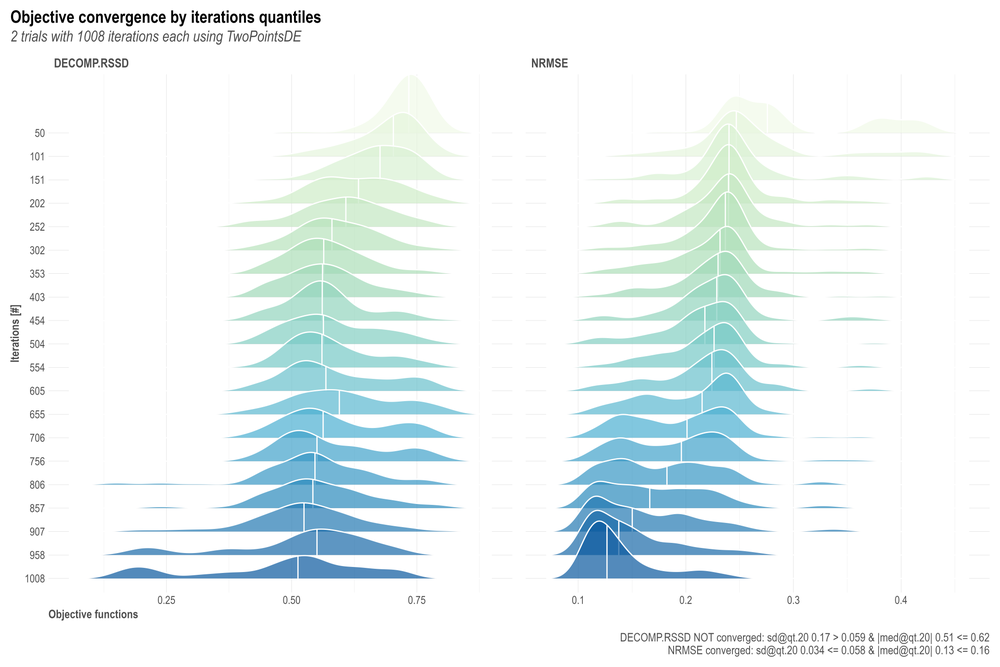

In [8]:
from utils.plot_utils import plot_outputgraphs

plot_outputgraphs(model_outputs, "moo_distrb_plot")

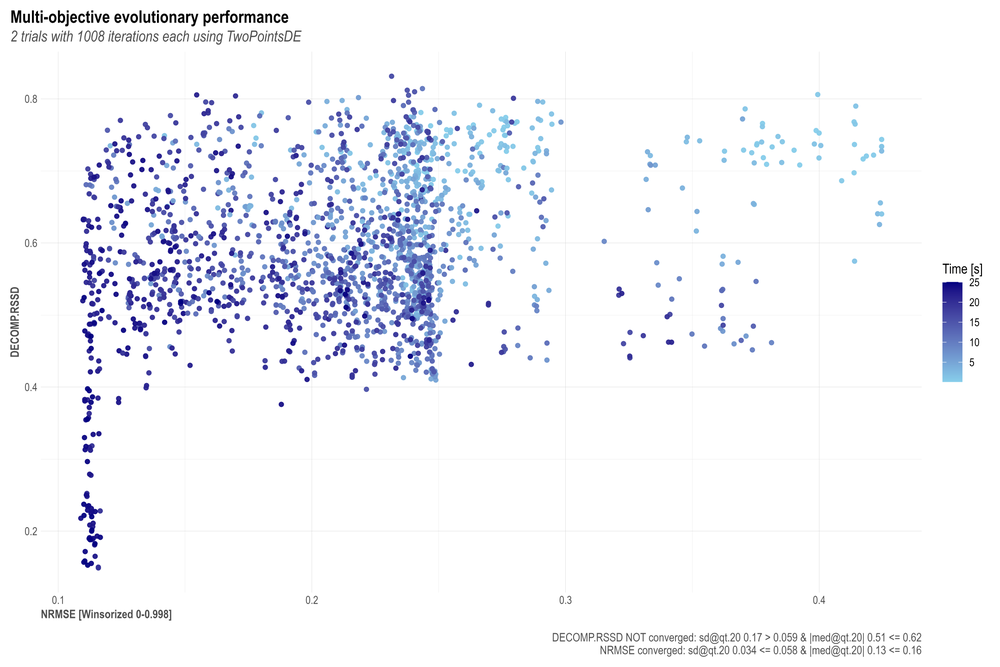

In [9]:
plot_outputgraphs(model_outputs, "moo_cloud_plot")

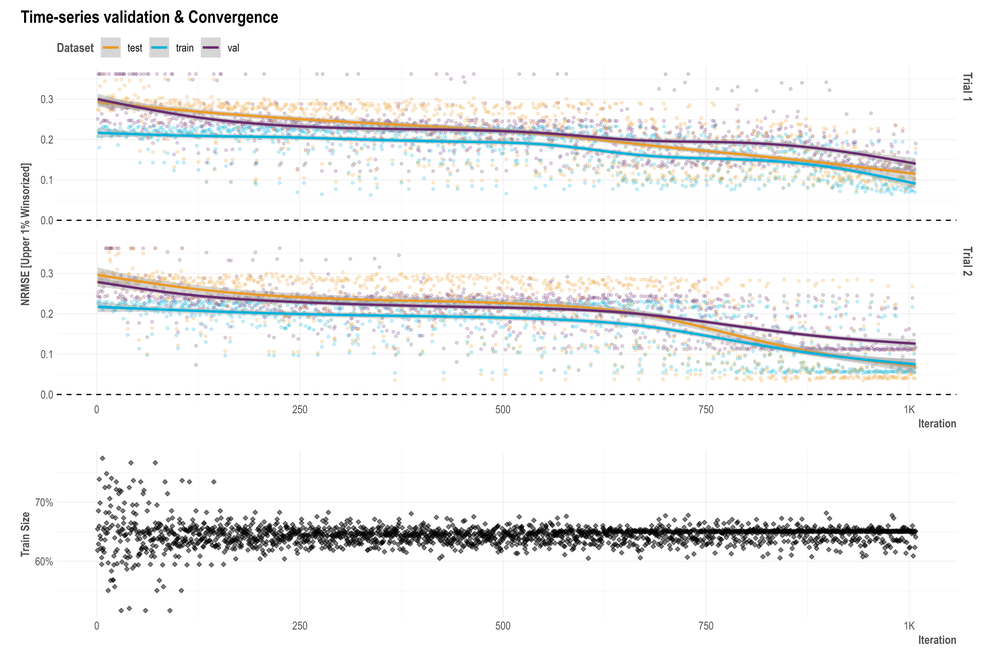

In [10]:
plot_outputgraphs(model_outputs, "ts_validation_plot")

## OutputCollect

In [11]:
from utils.data_mapper import import_output_collect

output_collect_raw_json_file = load_data_from_json(
    "/Users/yijuilee/robynpy_release_reviews/Robyn/python/src/tutorials/data/output_collect.json"
)

output_collect_python = import_output_collect(output_collect_raw_json_file)

In [12]:
# Preview ParetoResult
pareto_result = output_collect_python.get("pareto_result")
if pareto_result:
    print("🎯 ParetoResult:")
    print(f"  Number of Pareto solutions: {len(pareto_result.pareto_solutions)}")
    print(f"  Pareto fronts: {pareto_result.pareto_fronts}")

    print("\n  DataFrame Shapes:")
    print(f"  - result_hyp_param: {pareto_result.result_hyp_param.shape}")
    print(f"  - x_decomp_agg: {pareto_result.x_decomp_agg.shape}")
    print(f"  - media_vec_collect: {pareto_result.media_vec_collect.shape}")
    print(f"  - x_decomp_vec_collect: {pareto_result.x_decomp_vec_collect.shape}")

    if pareto_result.result_calibration is not None:
        print(f"  - result_calibration: {pareto_result.result_calibration.shape}")

    print("\n  Plot Data Types:")
    for plot_type in pareto_result.plot_data_collect.keys():
        print(f"  - {plot_type}")

    print("\n  First few columns of result_hyp_param:")
    print(pareto_result.result_hyp_param.head(3))
else:
    print("❌ ParetoResult not available")

# Preview ParetoData
print("\n----------------------------")
pareto_data = output_collect_python.get("pareto_data")
if pareto_data:
    print("📊 ParetoData:")
    print(f"  Pareto fronts: {pareto_data.pareto_fronts}")

    print("\n  DataFrame Shapes:")
    print(f"  - decomp_spend_dist: {pareto_data.decomp_spend_dist.shape}")
    print(f"  - result_hyp_param: {pareto_data.result_hyp_param.shape}")
    print(f"  - x_decomp_agg: {pareto_data.x_decomp_agg.shape}")

    print("\n  First few rows of decomp_spend_dist:")
    print(pareto_data.decomp_spend_dist.head(3))
else:
    print("❌ ParetoData not available")

# Preview Cluster Data
print("\n----------------------------")
cluster_data = output_collect_python.get("cluster_data")
if cluster_data:
    print("🔍 Cluster Data:")
    print(f"  Number of clusters: {cluster_data['n_clusters']}")

    if "data" in cluster_data:
        print(f"\n  Cluster DataFrame shape: {cluster_data['data'].shape}")
        print("\n  Cluster distribution:")
        if not cluster_data["data"].empty:
            print(cluster_data["data"]["cluster"].value_counts())

    if "df_cluster_ci" in cluster_data:
        print(f"\n  Cluster CI DataFrame shape: {cluster_data['df_cluster_ci'].shape}")
else:
    print("❌ Cluster Data not available")

print("\n=== End of Preview ===")

🎯 ParetoResult:
  Number of Pareto solutions: 106
  Pareto fronts: [5]

  DataFrame Shapes:
  - result_hyp_param: (106, 46)
  - x_decomp_agg: (1272, 48)
  - media_vec_collect: (132712, 11)
  - x_decomp_vec_collect: (16642, 18)

  Plot Data Types:
  - 3_206_6
  - 3_210_6
  - 3_212_8
  - 3_213_2
  - 3_214_2
  - 3_216_3
  - 3_217_5
  - 3_218_6
  - 3_219_4
  - 3_219_6
  - 3_219_8
  - 3_220_6
  - 3_221_1
  - 3_222_5
  - 3_222_9
  - 3_223_2
  - 3_184_3
  - 3_190_9
  - 3_195_3
  - 3_206_3
  - 3_207_4
  - 3_211_6
  - 3_211_8
  - 3_216_5
  - 3_217_2
  - 3_218_1
  - 3_218_5
  - 3_220_5
  - 3_189_3
  - 3_195_8
  - 3_196_6
  - 3_197_5
  - 3_198_1
  - 3_200_9
  - 3_202_1
  - 3_202_3
  - 3_202_7
  - 3_205_8
  - 3_211_4
  - 3_211_9
  - 3_214_1
  - 3_214_3
  - 3_214_7
  - 3_216_1
  - 3_216_7
  - 3_217_8
  - 3_219_2
  - 3_220_9
  - 3_221_6
  - 3_222_1
  - 4_170_2
  - 4_173_5
  - 4_184_8
  - 4_188_5
  - 4_220_5
  - 4_221_9
  - 4_223_8
  - 3_180_3
  - 3_193_3
  - 3_202_5
  - 3_204_3
  - 3_205_4
  - 3_205